In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# sampling
sample_1 = np.random.multivariate_normal([1, 0], [[0.15**2, 0], [0, 0.15**2]], 10)
sample_2 = np.random.multivariate_normal([0, 1], [[0.15**2, 0], [0, 0.15**2]], 1000)

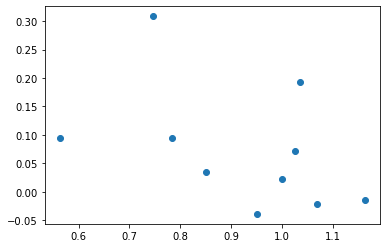

In [3]:
# Visualize
plt.scatter(sample_1[:, 0], sample_1[:, 1])

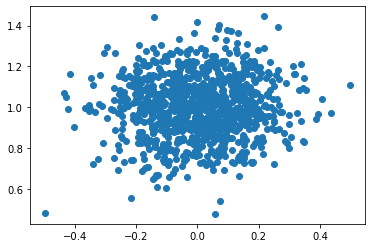

In [4]:
# Visualize
plt.scatter(sample_2[:, 0], sample_2[:, 1])

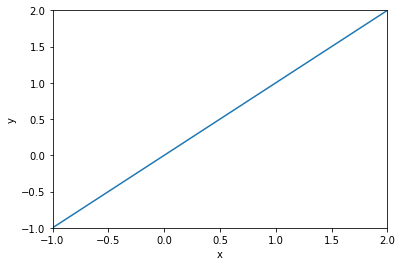

In [5]:
# expected
X = np.arange(-1, 2, 0.01)
Y = X

ax1 = plt.subplot(111)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xlim(-1, 2)
ax1.set_ylim(-1, 2)

ax1.plot(X, Y)

In [6]:
def plot_deviced_area(model, data, data_class):
    df = pd.merge(
        pd.DataFrame(data), pd.DataFrame(data_class), left_index=True, right_index=True
    )
    class_1_x = df.loc[df["0_y"] == 1, "0_x"]
    class_1_y = df.loc[df["0_y"] == 1, 1]
    class_2_x = df.loc[df["0_y"] == 2, "0_x"]
    class_2_y = df.loc[df["0_y"] == 2, 1]

    # 決定境界可視化用
    grid_line = np.arange(-10, 10, 0.05)
    X, Y = np.meshgrid(grid_line, grid_line)
    Z = model.predict(np.array([X.ravel(), Y.ravel()]).T)
    Z = Z.reshape(X.shape)

    # ここからグラフ描画
    # フォントの種類とサイズを設定する。
    plt.rcParams["font.size"] = 14
    plt.rcParams["font.family"] = "Times New Roman"

    # 目盛を内側にする。
    plt.rcParams["xtick.direction"] = "in"
    plt.rcParams["ytick.direction"] = "in"

    ax1 = plt.subplot(111)

    # グラフの上下左右に目盛線を付ける。
    ax1.yaxis.set_ticks_position("both")
    ax1.xaxis.set_ticks_position("both")

    # 軸のラベルを設定する。
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")

    # スケールの設定をする。
    ax1.set_xlim(-1, 2)
    ax1.set_ylim(-1, 2)

    # データプロットする。
    ax1.contourf(X, Y, Z, cmap="coolwarm")
    ax1.scatter(class_1_x, class_1_y, label="class=1", edgecolors="black")
    ax1.scatter(class_2_x, class_2_y, label="class=2", edgecolors="black")

    plt.legend()

    # グラフを表示する。
    plt.show()
    plt.close()

In [7]:
from sklearn.svm import SVC

model = SVC(kernel="linear")

data = np.concatenate([sample_1, sample_2])
data_class = np.concatenate([np.array([1] * 10), np.array([2] * 1000)])

model.fit(data, data_class)

SVC(kernel='linear')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


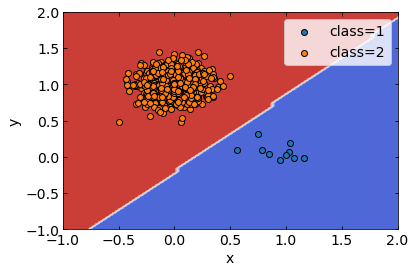

In [8]:
plot_deviced_area(model, data, data_class)

In [9]:
# predict example
print(model.predict(np.array([[0.5, 0.5], [0.7, 0.7]])))

[2 2]


In [10]:
from imblearn.under_sampling import RandomUnderSampler

rs = RandomUnderSampler(random_state=1)
under_sampled_data, under_sampled_data_class = rs.fit_resample(data, data_class)

under_sampled_model = SVC(kernel="linear")

under_sampled_model.fit(under_sampled_data, under_sampled_data_class)

SVC(kernel='linear')

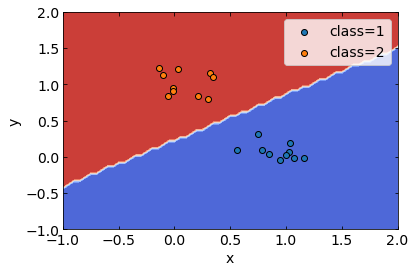

In [11]:
plot_deviced_area(under_sampled_model, under_sampled_data, under_sampled_data_class)

In [12]:
# over sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.5, random_state=42)
over_sampled_data, over_sampled_data_class = sm.fit_resample(data, data_class)

over_sampled_model = SVC(kernel="linear")
over_sampled_model.fit(over_sampled_data, over_sampled_data_class)

SVC(kernel='linear')

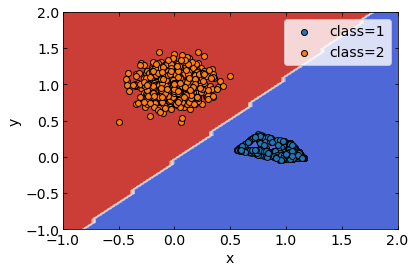

In [13]:
plot_deviced_area(over_sampled_model, over_sampled_data, over_sampled_data_class)